<a href="https://colab.research.google.com/github/clappingmin/deeplearning/blob/master/day01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf

dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

#######################################################

import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t',  sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

#######################################################
# 결측치 확인하기
dataset.isna().sum()

# 결측치 제거하기
dataset = dataset.dropna()

##############################################

# Origin열을 범주형 원-핫 엔코딩 변환
origin = dataset.pop('Origin')  # Origin컬럼을 삭제하고 origin에 보관

dataset['USA'] = (origin == 1) * 0.1
dataset['Europe'] = (origin == 2) * 0.1
dataset['Japan'] = (origin == 3) * 0.1


##############################################
# 80%로 분할하기
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset


##############################################
# standardscale

trans_stats = train_dataset.describe()
trans_stats.pop("MPG")  # label에 속하는 항목은 제거
trans_stats = trans_stats.transpose()

#############################################
# train_dataset와 test_dataset에서 MPG항목만 labels로 옮김

train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

# train_dataset, train_labels, test_dataset, test_labels
############################################
# standard scale
def norm(x):
  return (x-trans_stats['mean']) / trans_stats['std']

train_dataset = norm(train_dataset)
train_dataset

test_dataset = norm(test_dataset)

#############################################
# 모델 생성
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]),
  layers.Dense(64, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(1)
])

model.summary()

###########################################
optimizer = tf.keras.optimizers.SGD(lr=0.01)
#회귀 : loss:mse로 지표(metrics)는 mae
model.compile(optimizer=optimizer, loss="mse", metrics=["mae", "mse"])

###########################################
#학습하기 1000
# validation_split=0.2
history = model.fit(train_dataset, train_labels, epochs=1000, validation_split=0.2)

history.history.keys()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 19ms/step - loss: 455.2430 - mae: 19.4933 - mse: 455.2430 - val_loss: 183.0893 - val_mae: 11.3550 - val_mse: 183.0893
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 211.9

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,455.243011,19.493290,455.243011,183.089294,11.354987,183.089294,0
1,211.967224,12.142350,211.967224,262.453430,14.389376,262.453430,1
2,110.964966,8.270107,110.964966,15.202570,3.135247,15.202570,2
3,26.698393,3.779571,26.698393,18.235312,3.263858,18.235312,3
4,38.453354,4.530128,38.453354,19.228006,3.133916,19.228006,4
...,...,...,...,...,...,...,...
995,0.464038,0.384452,0.464038,7.582271,2.211386,7.582271,995
996,0.664012,0.471737,0.664012,7.980059,2.275152,7.980059,996
997,1.624959,0.656666,1.624959,10.589282,2.528329,10.589282,997
998,4.900444,1.624340,4.900444,12.134035,2.623864,12.134035,998


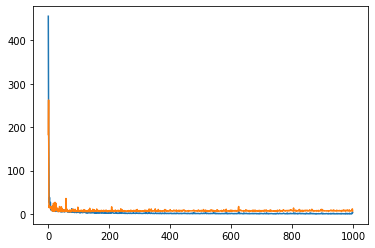

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], hist['mse'])
plt.plot(hist['epoch'], hist['val_mse'])
plt.show()


In [11]:
# 주택가격 예측하기_회귀
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
train_X
rrrrrrrrrrrrrrrrrrrrrrrrrr  ``
# [11]  PTRATIO 자치시(town)별 학생/교사 비율  
# [12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
# [13]  LSTAT 모집단의 하위계층의 비율(%) 
# [14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

57344/57026 [==============================] - 0s 0us/step


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])